In [9]:
from utils import read_column_from_excel, MultiLinearRegression, get_onehot_labels, PolynomialRegression

def convert_wave_shape(wave_shape):
    wave_shape_mapping = {
        '正弦波': 1,
        '三角波': 2,
        '梯形波': 3
    }
    return [wave_shape_mapping.get(wave, 0) for wave in wave_shape]

temperature1 = read_column_from_excel('附件一（训练集）.xlsx', column_name="温度，oC", sheet_name="材料1")
wave_shape1 = read_column_from_excel('附件一（训练集）.xlsx', column_name="励磁波形", sheet_name="材料1")
wave_shape1 = convert_wave_shape(wave_shape1)


temperature2 = read_column_from_excel('附件一（训练集）.xlsx', column_name="温度，oC", sheet_name="材料2")
wave_shape2 = read_column_from_excel('附件一（训练集）.xlsx', column_name="励磁波形", sheet_name="材料2")
wave_shape2 = convert_wave_shape(wave_shape2)

temperature3 = read_column_from_excel('附件一（训练集）.xlsx', column_name="温度，oC", sheet_name="材料3")
wave_shape3 = read_column_from_excel('附件一（训练集）.xlsx', column_name="励磁波形", sheet_name="材料3")
wave_shape3 = convert_wave_shape(wave_shape3)

temperature4 = read_column_from_excel('附件一（训练集）.xlsx', column_name="温度，oC", sheet_name="材料4")
wave_shape4 = read_column_from_excel('附件一（训练集）.xlsx', column_name="励磁波形", sheet_name="材料4")
wave_shape4 = convert_wave_shape(wave_shape4)

# wave_shape1

In [25]:
wave_shape4

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [12]:
import numpy as np

# 创建四个 (3400, 4) 的 one-hot 矩阵
one_hot_matrix1 = np.zeros((3400, 4))
one_hot_matrix1[:, 0] = 1  

one_hot_matrix2 = np.zeros((3000, 4))
one_hot_matrix2[:, 1] = 1  

one_hot_matrix3 = np.zeros((3200, 4))
one_hot_matrix3[:, 2] = 1  

one_hot_matrix4 = np.zeros((2800, 4))
one_hot_matrix4[:, 3] = 1  

print(one_hot_matrix1)
# 拼接 
x1 = np.column_stack((temperature1, wave_shape1, one_hot_matrix1))
x2 = np.column_stack((temperature2, wave_shape2, one_hot_matrix2))
x3 = np.column_stack((temperature3, wave_shape3, one_hot_matrix3))
x4 = np.column_stack((temperature4, wave_shape4, one_hot_matrix4))

x4.shape

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


(2800, 6)

**输入变量拼接**

In [13]:
combined = np.vstack((x1, x2, x3, x4))
combined.shape

(12400, 6)

In [23]:
print(combined)

[[25.  1.  1.  0.  0.  0.]
 [25.  1.  1.  0.  0.  0.]
 [25.  1.  1.  0.  0.  0.]
 ...
 [90.  3.  0.  0.  0.  1.]
 [90.  3.  0.  0.  0.  1.]
 [90.  3.  0.  0.  0.  1.]]


**拼接标签数据**

In [14]:
y1 = read_column_from_excel('附件一（训练集）.xlsx', column_name='磁芯损耗，w/m3', sheet_name='材料1')
y2 = read_column_from_excel('附件一（训练集）.xlsx', column_name='磁芯损耗，w/m3', sheet_name='材料2')
y3 = read_column_from_excel('附件一（训练集）.xlsx', column_name='磁芯损耗，w/m3', sheet_name='材料3')
y4 = read_column_from_excel('附件一（训练集）.xlsx', column_name='磁芯损耗，w/m3', sheet_name='材料4')
y4

0         2525.795337
1         4427.524958
2         5780.576037
3        10983.412600
4        14526.685680
            ...      
2795     20604.900210
2796     26504.284280
2797     46232.491530
2798     61458.085900
2799    107581.189300
Name: 磁芯损耗，w/m3, Length: 2800, dtype: float64

In [15]:
y4.shape

(2800,)

In [16]:
y_combined = np.concatenate((y1, y2, y3, y4))
y_combined.shape

(12400,)

**训练**

In [17]:

from sklearn.model_selection import train_test_split
# 多元逻辑回归
mlr = MultiLinearRegression()
X = combined
Y = y_combined

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
X.shape

(12400, 6)

In [19]:
# 拟合
mlr.fit(X_train, Y_train)
# 评估
score = mlr.score(X_test, Y_test)
print(f"Model R² score: {score}")

Model R² score: 0.051920013902167605


In [20]:
from utils import RandomForestRegressorModel

# 创建模型实例
rf_model = RandomForestRegressorModel(n_estimators=100, random_state=42)

# 训练模型
rf_model.train(X_train, Y_train)

    # 进行预测
predictions = rf_model.predict(X_test)

# 评估模型
r2, mse = rf_model.evaluate(Y_test, predictions)

print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")


R² Score: 0.05818992851726035
Mean Squared Error: 126709761013.04173


In [21]:
# 创建多项式回归对象
model = PolynomialRegression(degree=4)
    
# 训练模型
model.fit(X_train, Y_train)

# 评估模型
mse, r2 = model.evaluate(X_test, Y_test)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 126620213682.50525
R² Score: 0.05885551715936177


d:\miniforge3\envs\study\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.76781e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


## 单因素
1. 温度对磁芯损耗的影响

In [22]:
# 温度与磁芯损耗
print(X.shape)  # 第一列为温度
print(X)
print(Y)

# 设置字体
plt.rcParams['font.family'] = 'SimHei'  # 使用黑体字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题


# 绘图
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 X 是特征矩阵（NumPy 数组），Y 是目标变量（NumPy 数组或列表）
temperature = X[:, 0]  # 获取第一列温度
loss = Y  # 磁芯损耗

# 绘制散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(x=temperature, y=loss)
plt.title('温度对磁芯损耗的影响')
plt.xlabel('温度')
plt.ylabel('磁芯损耗')
plt.grid()
plt.show()

# 绘制箱形图
plt.figure(figsize=(10, 6))
sns.boxplot(x=temperature, y=loss)
plt.title('温度对磁芯损耗的影响（箱型图）')
plt.xlabel('温度 (°C)')
plt.ylabel('磁芯损耗')
plt.grid()
plt.show()



(12400, 6)
[[25.  1.  1.  0.  0.  0.]
 [25.  1.  1.  0.  0.  0.]
 [25.  1.  1.  0.  0.  0.]
 ...
 [90.  3.  0.  0.  0.  1.]
 [90.  3.  0.  0.  0.  1.]
 [90.  3.  0.  0.  0.  1.]]
[  1997.95525   2427.74983   3332.72576 ...  46232.49153  61458.0859
 107581.1893 ]


NameError: name 'plt' is not defined

### 方差分析（温度->磁芯损耗）

In [107]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 将温度转换为 DataFrame
data = pd.DataFrame({'温度': temperature, '磁芯损耗': loss})

# 将温度分组
data['温度组'] = pd.cut(data['温度'], bins=[0, 25, 50, 75, 100], labels=['25', '50', '70', '90'])

# 执行方差分析
model = ols('磁芯损耗 ~ C(温度组)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                sum_sq       df          F        PR(>F)
C(温度组)    7.513337e+12      3.0  17.755424  1.699619e-11
Residual  1.748486e+15  12396.0        NaN           NaN




### 结果解读

1. **`sum_sq`（平方和）**：
   - `C(温度组)` 的平方和为  
7.51
×
10
12
7.51×10 
12，表示温度组之间的变异性。
   - `Residual`（残差）的平方和为 \(1.75 \times 10^{15}\)，表示组内变异性。

2. **`df`（自由度）**：
   - `C(温度组)` 的自由度为 3，表示你有四个温度组（四个类别减一）。
   - `Residual` 的自由度为 12396，表示样本总数减去组数。

3. **`F` 值**：
   - `F` 值为 17.76，表示组间变异性与组内变异性的比率，越大说明组间差异越明显。

4. **`PR(>F)`（p 值）**：
   - p 值为 1.70×10 
−11
 ，远小于 0.05，表明温度组之间的差异是显著的。

### 结论
由于 p 值小于显著性水平（如 0.05），你可以拒绝原假设，认为不同温度组之间的磁芯损耗存在显著差异。这表明温度确实对磁芯损耗有影响。


2. (波形)--->磁芯损耗的影响

In [149]:
print(X.shape)
wshape = X[:, 1:4]  # 获取波形
loss = Y  # 磁芯损耗

output = np.zeros(wshape.shape[0], dtype=int)

# 创建一个条件来识别每种波形类型
output[np.all(wshape == [1, 0, 0], axis=1)] = 2  # 对应 [0, 0, 1] 三角
output[np.all(wshape == [0, 1, 0], axis=1)] = 3  # 对应 [0, 1, 0] 梯形
output[np.all(wshape == [0, 0, 1], axis=1)] = 1  # 对应 [1, 0, 0] 方形


print(output)
print(output.shape)

(12400, 8)
[1 1 1 ... 3 3 3]
(12400,)


In [110]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 假设 X 是特征矩阵，Y 是磁芯损耗
# wshape 是波形的 one-hot 编码
wshape = X[:, 1:4]  # 获取波形
loss = Y  # 磁芯损耗

# 将波形转换为 DataFrame
waveform_labels = ['Waveform 1', 'Waveform 2', 'Waveform 3']
wshape_df = pd.DataFrame(wshape, columns=waveform_labels)

# 将磁芯损耗和波形数据合并
data = pd.DataFrame({'磁芯损耗': loss})
data = pd.concat([data, wshape_df], axis=1)

print(data)
print(data.shape)

# 将数据转换为长格式
data_long = data.melt(id_vars=['磁芯损耗'], value_vars=waveform_labels, var_name='波形', value_name='是否选择')

# 选择被选择的波形
data_selected = data_long[data_long['是否选择'] == 1]

# 执行方差分析
model = ols('磁芯损耗 ~ C(波形)', data=data_selected).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                磁芯损耗  Waveform 1  Waveform 2  Waveform 3
0        1997.955250         0.0         0.0         1.0
1        2427.749830         0.0         0.0         1.0
2        3332.725760         0.0         0.0         1.0
3        4502.908007         0.0         0.0         1.0
4        6063.023248         0.0         0.0         1.0
...              ...         ...         ...         ...
12395   20604.900210         0.0         1.0         0.0
12396   26504.284280         0.0         1.0         0.0
12397   46232.491530         0.0         1.0         0.0
12398   61458.085900         0.0         1.0         0.0
12399  107581.189300         0.0         1.0         0.0

[12400 rows x 4 columns]
(12400, 4)
                sum_sq       df           F         PR(>F)
C(波形)     7.520255e+13      2.0  277.334572  1.485398e-118
Residual  1.680797e+15  12397.0         NaN            NaN


In [111]:
print(X.shape)
print(Y.shape)

(12400, 8)
(12400,)


In [112]:
combined_XY = np.column_stack((X, Y))

# 验证形状
print(combined_XY.shape)  # 应该输出 (12400, 9)

(12400, 9)


In [192]:
combined_XY[:,1:4]

# print(combined_XY[:,1:4])

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [206]:
import numpy as np
# 筛选25度，材料1
# 假设 combined_XY 已经被定义
filtered_data = combined_XY[
    (combined_XY[:, 0] == 70) & 
    (combined_XY[:, 4].astype(int) == 0) & 
    (combined_XY[:, 5].astype(int) == 0) & 
    (combined_XY[:, 6].astype(int) == 0) & 
    (combined_XY[:, 7].astype(int) == 1)
]

print(filtered_data)
filtered_data.shape


[[7.00000000e+01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 7.74681759e+02]
 [7.00000000e+01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 9.30356940e+02]
 [7.00000000e+01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 1.28141371e+03]
 ...
 [7.00000000e+01 0.00000000e+00 1.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 6.76293206e+03]
 [7.00000000e+01 0.00000000e+00 1.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 9.02959678e+03]
 [7.00000000e+01 0.00000000e+00 1.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 1.18914450e+04]]


(687, 9)

In [207]:
print(filtered_data[:, 1:4])

wave_id = filtered_data[:, 1:4]
output = np.zeros(wave_id.shape[0], dtype=int)
output[np.all(wave_id == [0, 0, 1], axis=1)] = 1  # 对应 [0, 0, 1] 正
output[np.all(wave_id == [0, 1, 0], axis=1)] = 3  # 对应 [0, 1, 0] 梯形
output[np.all(wave_id == [1, 0, 0], axis=1)] = 2  # 对应 [1, 0, 0] 三角

# x_1 = np.argmax(filtered_data[:, 1:4], axis=1)
# x_1
output

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

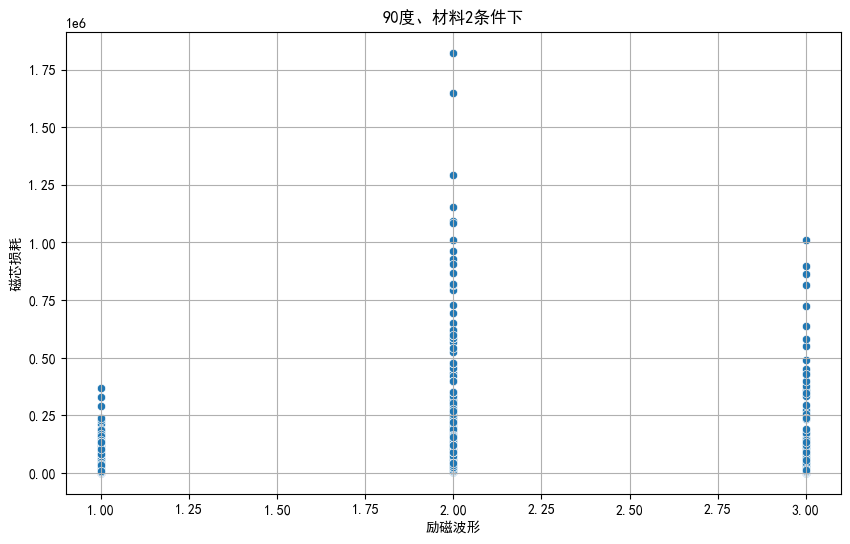

In [208]:
# 绘制散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(x=output, y=filtered_data[: , 8])
plt.title('90度、材料2条件下')
plt.xlabel('励磁波形')
plt.ylabel('磁芯损耗')
plt.grid()
plt.show()